Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Default n_estimators=10, Accuracy: 1.0000

Confusion Matrix (default 10 trees):
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


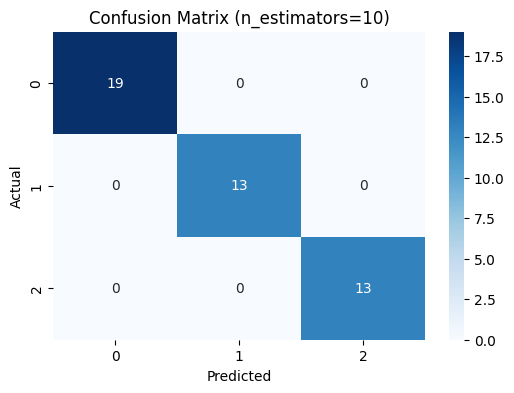


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



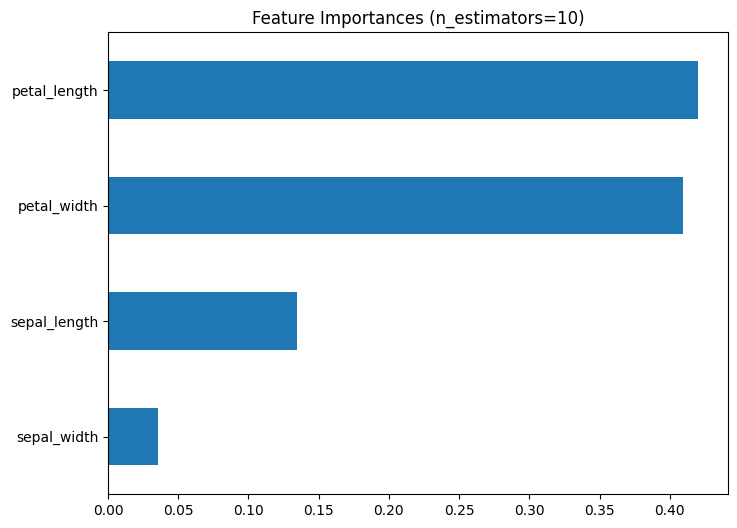

n_estimators=1, Accuracy: 1.0000
n_estimators=6, Accuracy: 1.0000
n_estimators=11, Accuracy: 1.0000
n_estimators=16, Accuracy: 1.0000
n_estimators=21, Accuracy: 1.0000
n_estimators=26, Accuracy: 1.0000
n_estimators=31, Accuracy: 1.0000
n_estimators=36, Accuracy: 1.0000
n_estimators=41, Accuracy: 1.0000
n_estimators=46, Accuracy: 1.0000
n_estimators=51, Accuracy: 1.0000
n_estimators=56, Accuracy: 1.0000
n_estimators=61, Accuracy: 1.0000
n_estimators=66, Accuracy: 1.0000
n_estimators=71, Accuracy: 1.0000
n_estimators=76, Accuracy: 1.0000
n_estimators=81, Accuracy: 1.0000
n_estimators=86, Accuracy: 1.0000
n_estimators=91, Accuracy: 1.0000
n_estimators=96, Accuracy: 1.0000

Best accuracy 1.0000 achieved with n_estimators=1


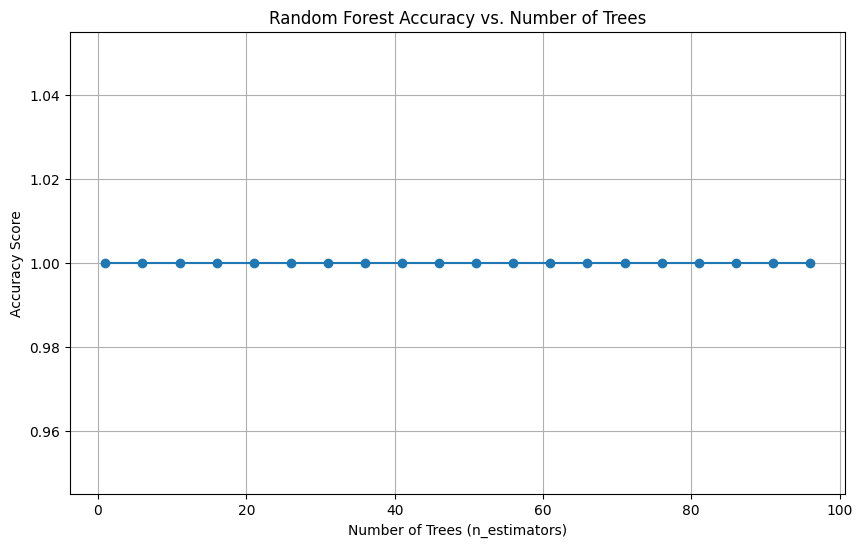

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/iris.csv'
data = pd.read_csv(file_path)

# Inspect columns
print("Columns:", data.columns)

# Assume last column is target, others are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Build Random Forest with default n_estimators=10
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
score_default = accuracy_score(y_test, y_pred_default)
print(f"Default n_estimators=10, Accuracy: {score_default:.4f}")

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred_default)
print("\nConfusion Matrix (default 10 trees):")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (n_estimators=10)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_default))

# Show feature importance
importances = rf_default.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importances (n_estimators=10)')
plt.show()

# 2️⃣ Fine-tune number of trees
best_score = 0
best_n = 0
scores = []
n_values = range(1, 101, 5)  # Try from 1 to 100 in steps of 5
for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    print(f"n_estimators={n}, Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest accuracy {best_score:.4f} achieved with n_estimators={best_n}")

# Plot scores vs. number of trees
plt.figure(figsize=(10,6))
plt.plot(n_values, scores, marker='o')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs. Number of Trees')
plt.grid(True)
plt.show()


Columns: Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income_level'],
      dtype='object')
Default n_estimators=10, Accuracy: 0.8277

Confusion Matrix (n=10):
[[10722   387]
 [ 2138  1406]]


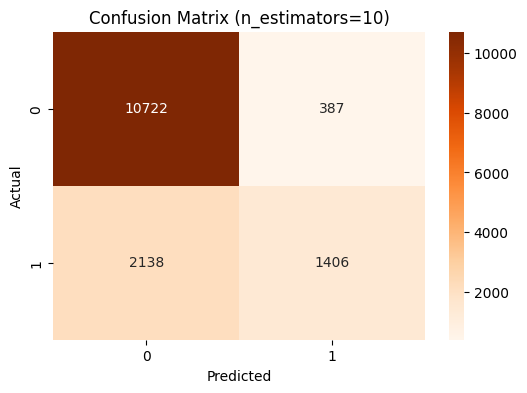


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89     11109
           1       0.78      0.40      0.53      3544

    accuracy                           0.83     14653
   macro avg       0.81      0.68      0.71     14653
weighted avg       0.82      0.83      0.81     14653

n_estimators=1, Accuracy: 0.8007
n_estimators=6, Accuracy: 0.8214
n_estimators=11, Accuracy: 0.8240
n_estimators=16, Accuracy: 0.8244
n_estimators=21, Accuracy: 0.8248
n_estimators=26, Accuracy: 0.8285
n_estimators=31, Accuracy: 0.8295
n_estimators=36, Accuracy: 0.8300
n_estimators=41, Accuracy: 0.8301
n_estimators=46, Accuracy: 0.8302
n_estimators=51, Accuracy: 0.8292
n_estimators=56, Accuracy: 0.8292
n_estimators=61, Accuracy: 0.8297
n_estimators=66, Accuracy: 0.8302
n_estimators=71, Accuracy: 0.8303
n_estimators=76, Accuracy: 0.8305
n_estimators=81, Accuracy: 0.8307
n_estimators=86, Accuracy: 0.8305
n_estimators=91, Accuracy: 0.8305
n_est

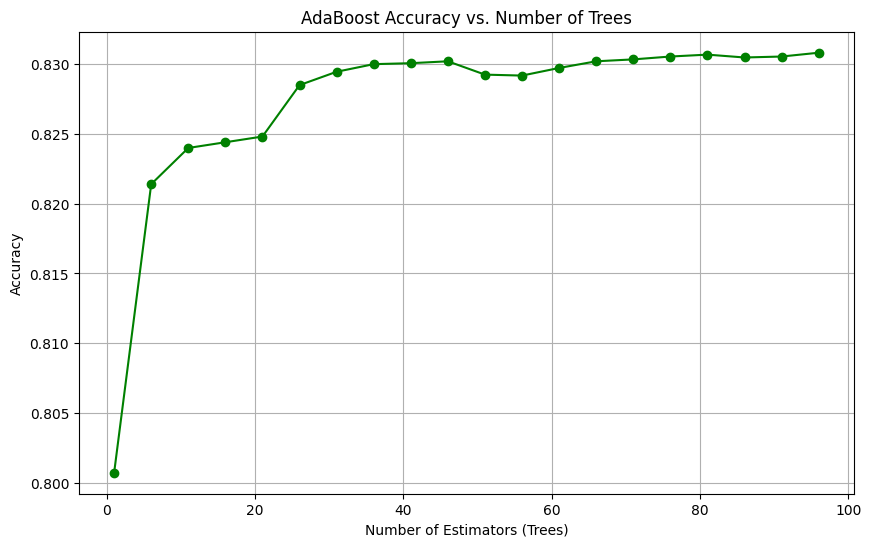